In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [47]:
data = pd.read_csv('brca.csv')


   Unnamed: 0  x.radius_mean  x.texture_mean  x.perimeter_mean  x.area_mean  \
0           1         13.540           14.36             87.46        566.3   
1           2         13.080           15.71             85.63        520.0   
2           3          9.504           12.44             60.34        273.9   
3           4         13.030           18.42             82.61        523.8   
4           5          8.196           16.84             51.71        201.9   

   x.smoothness_mean  x.compactness_mean  x.concavity_mean  \
0            0.09779             0.08129           0.06664   
1            0.10750             0.12700           0.04568   
2            0.10240             0.06492           0.02956   
3            0.08983             0.03766           0.02562   
4            0.08600             0.05943           0.01588   

   x.concave_pts_mean  x.symmetry_mean  ...  x.texture_worst  \
0            0.047810           0.1885  ...            19.26   
1            0.031100   

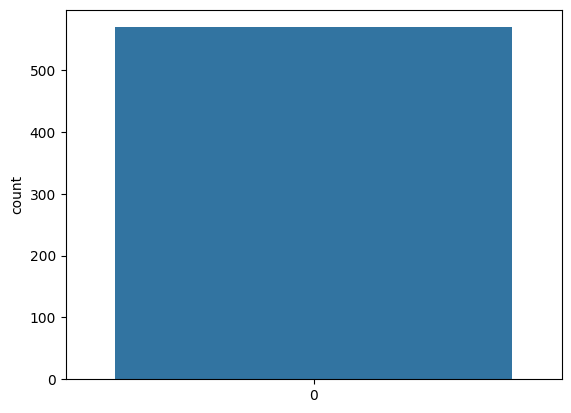

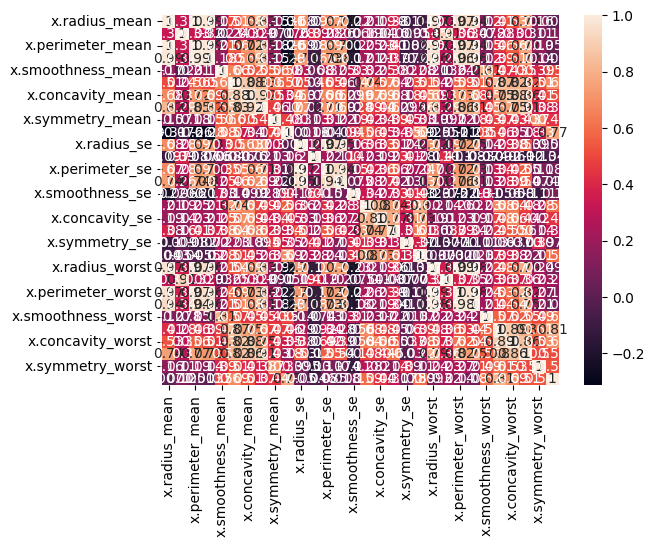

In [61]:
# Displaying the first few rows and dimensions of the dataset
print(data.head())

print(data.shape)

# Checking for missing values
print(data.isnull().sum())

# Encoding the target variable
le = LabelEncoder()
data['y'] = le.fit_transform(data['y'])

# Exploring the distribution of the target variable and the correlation between features
sns.countplot(data['y'])
plt.show()

corr = data.iloc[:, 1:-1].corr()
sns.heatmap(corr, annot=True)
plt.show()


In [50]:
# Separating the features and target variable
X = data.iloc[:, 1:-1]
y = data['y']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [62]:
# Initializing the SVM classifier and training the classifier
svm = SVC()

svm.fit(X_train_scaled, y_train)


SVC()

In [63]:
# Making predictions on the testing data and calculating the accuracy score
y_pred = svm.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generating a classification report
classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)


Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.97      0.97        71
           M       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

